In [63]:
# clone git

In [64]:
!rm -rf ../data/external
!rm -rf ../nlp_utils_repo

In [65]:
!git clone https://github.com/OnlpLab/Hebrew-Sentiment-Data.git ../data/external/OnlpLab
!git clone https://github.com/wzwzeyal/nlp_utils_repo.git ./nlp_utils_repo

Cloning into '../data/external/OnlpLab'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 67 (delta 35), reused 27 (delta 15), pack-reused 0
Unpacking objects: 100% (67/67), 1.65 MiB | 2.28 MiB/s, done.
fatal: destination path './nlp_utils_repo' already exists and is not an empty directory.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nlp_utils_repo.nlp_utils import clean_data


In [67]:
ROOT_PATH = '../data/external/OnlpLab/Sentiment_Data'
FIG_SIZE = (20, 15)


In [68]:
def get_onlp_data(token_or_morph, data_type):
  return pd.read_csv(f'{ROOT_PATH}/{token_or_morph}/{data_type}.tsv', sep='\t')

In [69]:
train_token_df = get_onlp_data('token', 'train')
val_token_df = get_onlp_data('token', 'dev')

train_morph_df = get_onlp_data('morph', 'train')
val_morph_df = get_onlp_data('morph', 'dev')

In [70]:
datasets = [
  {"name": "train_token_df", "df": train_token_df},
  {"name": "val_token_df", "df": val_token_df},
  {"name": "train_morph_df", "df": train_morph_df},
  {"name": "val_morph_df", "df": val_morph_df},
]

In [71]:
codes = {0 : 'pos', 1: 'neg', 2: 'nut'}
palette = {'pos': 'green', 'neg': 'red', 'nut': 'gray'}


In [72]:
for dataset in datasets:
  df = dataset['df']
  clean_data(df, 'comment', 'comment_clean')
  df['sentiment'] = df.label.map(codes)
  df['comment_clean_len'] = df.comment_clean.str.len()

In [73]:
train_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
1141,הצדק תמיד מנצח ובגדול.יחי הנשיא תחי מדינת ישראל,0,הצדק תמיד מנצח ובגדוליחי הנשיא תחי מדינת ישראל,pos,46
3745,לא מעניין,1,לא מעניין,neg,9
400,שמחתי לשמוע שנבחרת לנשיאה של מדינת ישראל מי ית...,0,שמחתי לשמוע שנבחרת לנשיאה של מדינת ישראל מי ית...,pos,152
3295,מרגש ומקסים בהצלחה !!!,0,מרגש ומקסים בהצלחה,pos,18
1580,מאכזב ......,1,מאכזב,neg,5


In [74]:
val_token_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
614,אולי אינך יודע אבל הדבר היחידי שמקבלים כאן בלי...,2,אולי אינך יודע אבל הדבר היחידי שמקבלים כאן בלי...,nut,68
509,בהצלחה רבה מברוך צוקר,0,בהצלחה רבה מברוך צוקר,pos,21
401,"לפי הרופאים הוא ימות בכלא , איך גוזרים גזר די...",1,לפי הרופאים הוא ימות בכלא איך גוזרים גזר דין מ...,neg,219
798,רובי ריבלין - הנשיא הבא של כולנן .,0,רובי ריבלין הנשיא הבא של כולנן,pos,30
250,אישה מדהימה . מי צריך יותר ?!,0,אישה מדהימה מי צריך יותר,pos,24


In [75]:
train_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
1490,אין ברירה שנית שוב . מקווה ש יתן התייחסותו ל ה...,1,אין ברירה שנית שוב מקווה יתן התייחסותו עולם תח...,neg,82
2820,ה רווחת ב יושר ב הצלחה כל ה כבוד !,0,רווחת יושר הצלחה כל כבוד,pos,24
1810,"ב ה הצלחה , זכינו ל ה נשיא , חם ו משפחתי , אנ...",0,הצלחה זכינו נשיא חם משפחתי אני מאמינה תוביל את...,pos,58
852,אוי רובי רובי יא חתיכת פאטת . לא הכרת את הוא כ...,1,אוי רובי רובי יא חתיכת פאטת לא הכרת את הוא כפי...,neg,146
1349,"כבוד ה נשיא , פער רב מאד עובר בין התנגדות ל א...",1,כבוד נשיא פער רב מאד עובר בין התנגדות אלימות ה...,neg,177


In [76]:
val_morph_df.sample(5)

,comment,label,comment_clean,sentiment,comment_clean_len
22,עוד לפני רגע חיילים של אנחנו נלחמו נגדם ו הנה...,1,עוד לפני רגע חיילים של אנחנו נלחמו נגדם הנה נש...,neg,163
749,נכון . אין מקום ל גזענות . אבל כבוד ה נשיא אם ...,1,נכון אין מקום גזענות אבל כבוד נשיא אם אתה מגנה...,neg,163
599,אדוני נשיא ה מדינה ב רכות ו המון הצלחה ו בריאו...,0,אדוני נשיא מדינה רכות המון הצלחה בריאות,pos,39
844,ב ימים קשים כולם מקצינים את דעותיהם ו מעשיהם מ...,0,ימים קשים כולם מקצינים את דעותיהם מעשיהם מי ית...,pos,216
80,יאללה רובי כולם יודעים ש זה לא דעתך ה אמיתית ...,1,יאללה רובי כולם יודעים זה לא דעתך אמיתית די הת...,neg,75


In [78]:
datasets[0]['df']

,comment,label,comment_clean,sentiment,comment_clean_len
0,ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד...,0,ממש כואב אני בוכה עם המשפחה שלא תדעו עוד צער,pos,44
1,כל הכבוד והמון בהצלחה,0,כל הכבוד והמון בהצלחה,pos,21
2,"תל חי , רובי . בכל העצב הזה היית קרן אור של ת...",0,תל חי רובי בכל העצב הזה היית קרן אור של תקוה א...,pos,63
3,נקי כפיים ובר לבב בהצלחה לך ולנו .,0,נקי כפיים ובר לבב בהצלחה לך ולנו,pos,32
4,רובי חג שמח והצלחה בבחירות לנשיאות .,0,רובי חג שמח והצלחה בבחירות לנשיאות,pos,34
...,...,...,...,...,...
5921,כל הכבוד לנשיא שלנו !,0,כל הכבוד לנשיא שלנו,pos,19
5922,לשבעת המגייבים הקודמים : דמוקרטיה אין פירושה ...,1,לשבעת המגייבים הקודמים דמוקרטיה אין פירושה למח...,neg,386
5923,ישששששששששששששששש בשעה טובה איש מדהים איש אמת ...,0,ישש בשעה טובה איש מדהים איש אמת עם ישראל בשעתו...,pos,53
5924,יחי יחי נשיא מדינת ישראל רובי רבלין.אנא מימך א...,0,יחי יחי נשיא מדינת ישראל רובי רבליןאנא מימך אל...,pos,208


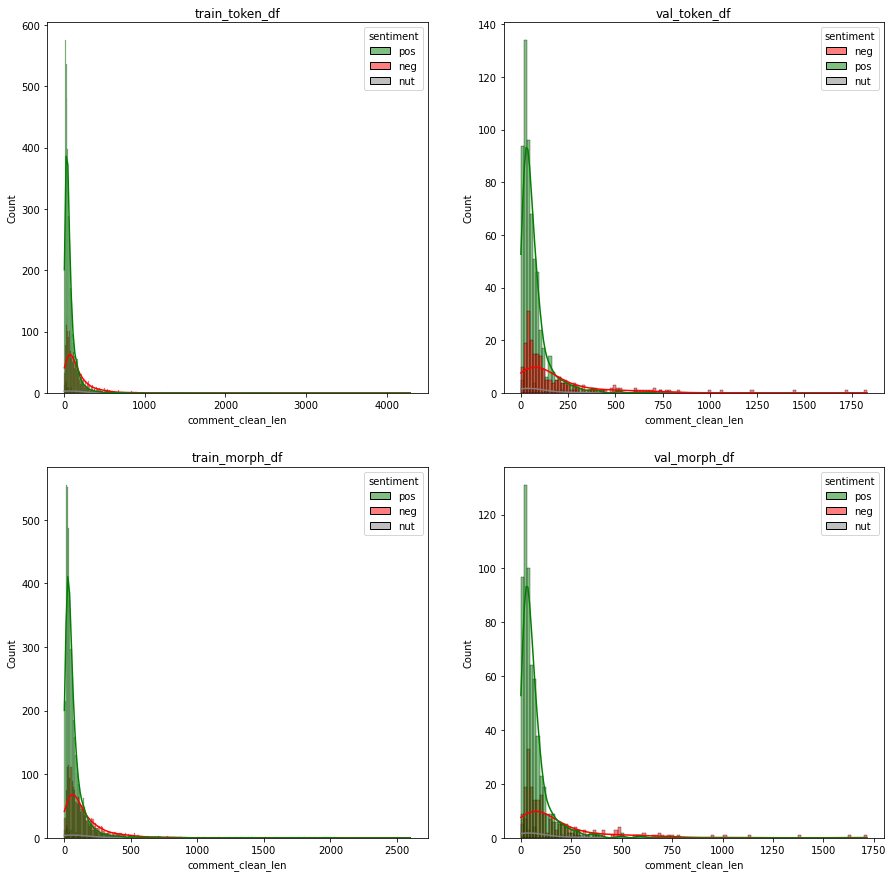

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))#, gridspec_kw={'hspace': 1.2, 'wspace': 1.5})

for ax, dataset in zip(axes.flatten(), datasets):
  sns.histplot(dataset['df'], x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()


#for ax in axs:


In [80]:
MAX_LEN=512

# for dataset in datasets:
#   df = dataset['df']
#   df = df[df.comment_clean_len < MAX_LEN]

for idx in range(len(datasets)):
  df = datasets[idx]['df']
  datasets[idx]['df'] = df[df.comment_clean_len < MAX_LEN]

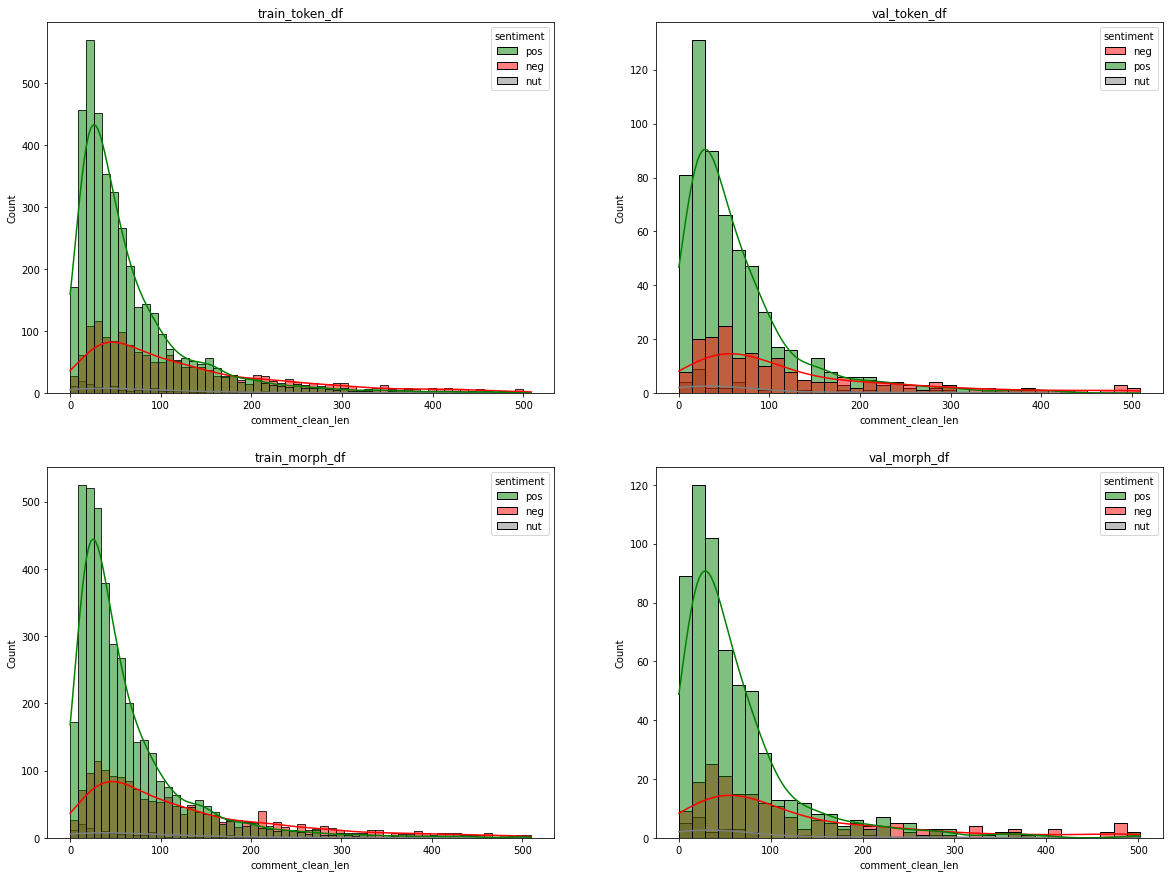

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=FIG_SIZE)

for ax, dataset in zip(axes.flatten(), datasets):
  df = dataset['df']
  sns.histplot(df, x='comment_clean_len', hue='sentiment', palette=palette, ax=ax, kde=True)
  ax.set_title(dataset['name'])

plt.show()

In [82]:
SENTIMENT_DATA = '../data/for_sentiment'

!mkdir SENTIMENT_DATA

for dataset in datasets:
  name = dataset['name']
  dataset['df'].to_csv(
      f'{SENTIMENT_DATA}/{name}.gz',
       compression = 'gzip')

mkdir: cannot create directory ‘SENTIMENT_DATA’: File exists
